Import the libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2023-05-02 13:48:12.630749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 13:48:12.858795: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-02 13:48:12.899383: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-02 13:48:12.899397: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

Load the cifar-10 dataset, that consists in 60k 32x32 color images in 10 classes. They are balance, so 6k images per class.

Normalize the values to be between 0 and 1

In [3]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

A simple architecture with 5 layers. 3 convolutional, 1 pooling and 1 dense

Input layer : takes the input image, usually in the form of a 2D matrix of pixel values.

Convolutional layer: applies a set of learnable filters to the input image in order to extract filters. Each filter performs a convolution operation of the input, producing a new feature map that represents a specific feature of the input.

ReLU layer: applies the Rectified Linear Unit activation function to the output of the convolutional layer, which introduces non-linearity and allows the network to learn more complex features.

Pooling layer: performs down-sampling on the output of the ReLU layer, tipically by taking the maximum or average value within a certain region of the feature map. This reduces the spatial dimensions of the output and makes the network more computationally efficient.

Dropout Layer = randomly drops out some of the neurons in the network during training, which helps prevent overfitting and improves generalization.

Fully-connected layer = this layer takes the flattened output from the previous layer and applies a set of learnable weights to produce a prediction for each class.

Output layer : produces the final output of the network, which is a probability distribution over the classes. The class with the highest probability is chosen as the predicted class.

In [5]:
# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4673 - accuracy: 0.4688 - val_loss: 1.2150 - val_accuracy: 0.5717
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1162 - accuracy: 0.6069 - val_loss: 1.0200 - val_accuracy: 0.6362
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9649 - accuracy: 0.6628 - val_loss: 0.9712 - val_accuracy: 0.6605
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8709 - accuracy: 0.6956 - val_loss: 0.9088 - val_accuracy: 0.6771
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7989 - accuracy: 0.7239 - val_loss: 0.8667 - val_accuracy: 0.6944
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7393 - accuracy: 0.7436 - val_loss: 0.8655 - val_accuracy: 0.7103
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6859 - accuracy: 0.7611 - val_loss: 0.8491 - val_ac

313/313 - 1s - loss: 0.8571 - accuracy: 0.7223 - 1000ms/epoch - 3ms/step
Test accuracy: 0.7222999930381775


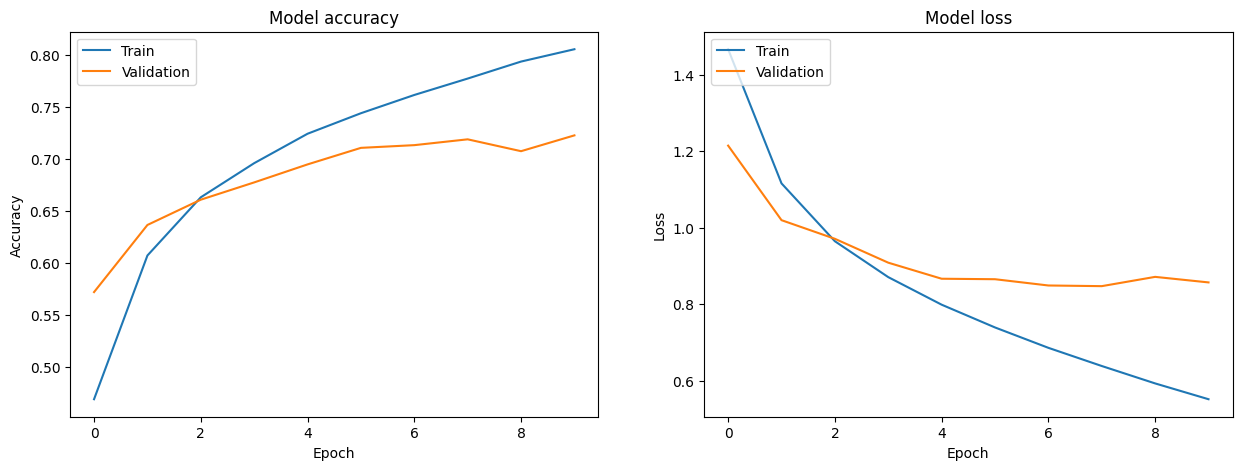

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

# Plot accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

fig = plt.gcf()
fig.set_size_inches(15,5)

# Show plots
plt.show()